At this level we'll use regression models to analyze the factors (single attributes) and compare their impact on housing rent.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../CSV's/Mubawab_Rental_Data_Transformed_&_Preprocessed_&_Explored.csv")
print(df.shape)
df.head()

(8801, 36)


,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Model 1 - Room Attributes:


We will create a regression model with “Nombre De Chambres”, “Nombre De Salles De Bain”, and “Nombre De Pièces” as independent variables. This would allow us to see how these room-related attributes collectively influence the rental price.

In [3]:
# Model 1 - Room Attributes
X1 = df[['Nombre De Pièces','Nombre De Chambres', 'Nombre De Salles De Bain']]
y = df['Prix']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=5)

model1 = LinearRegression()
model1.fit(X1_train, y_train)

y1_pred = model1.predict(X1_test)

#### Model 2 - Surface:

We will create a separate regression model with “Surface” as the independent variable. This would show us how the size of the property influences the rental price.

In [4]:
# Model 2 - Surface
X2 = df[['Surface']]

X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=5)

model2 =LinearRegression()
model2.fit(X2_train, y_train)

y2_pred = model2.predict(X2_test)


#### Model 3- Étage

In [5]:
X3 = df[['Étage']]

X3_train, X3_test = train_test_split(X3, test_size=0.2, random_state=5)

model3 =LinearRegression()
model3.fit(X3_train, y_train)

y3_pred = model3.predict(X3_test)



##### Accuracy

In [6]:
# Model 1:
r2_1 = r2_score(y_test, y1_pred)
mse_1 = mean_squared_error(y_test, y1_pred)
rmse_1 = np.sqrt(mse_1)
residuals1 = y_test - y1_pred
SE1 = np.sqrt(np.sum(residuals1**2) / (len(y_test) - 2))
# Model 2:
r2_2 = r2_score(y_test, y2_pred)
mse_2 = mean_squared_error(y_test, y2_pred)
rmse_2 = np.sqrt(mse_2)
residuals1 = y_test - y1_pred
SE2 = np.sqrt(np.sum(residuals1**2) / (len(y_test) - 2))
# Model 3:
r2_3 = r2_score(y_test, y3_pred)
mse_3 = mean_squared_error(y_test, y3_pred)
rmse_3 = np.sqrt(mse_3)
residuals3 = y_test - y2_pred
SE3 = np.sqrt(np.sum(residuals3**2) / (len(y_test) - 2))

In [7]:
print(f'Model 1 R²: {r2_1:.4f}, RMSE: {rmse_1:.2f}, MSE: {mse_1:.2f}, SE: {SE1:.2f}')
print(f'Model 2 R²: {r2_2:.4f}, RMSE: {rmse_2:.2f}, MSE: {mse_2:.2f}, SE: {SE2:.2f}')
print(f'Model 3 R²: {r2_3:.4f}, RMSE: {rmse_3:.2f}, MSE: {mse_3:.2f}, SE: {SE2:.2f}')


Model 1 R²: 0.3583, RMSE: 3576.15, MSE: 12788864.89, SE: 3578.18
Model 2 R²: 0.1142, RMSE: 4201.65, MSE: 17653892.14, SE: 3578.18
Model 3 R²: 0.0183, RMSE: 4423.35, MSE: 19566000.60, SE: 3578.18


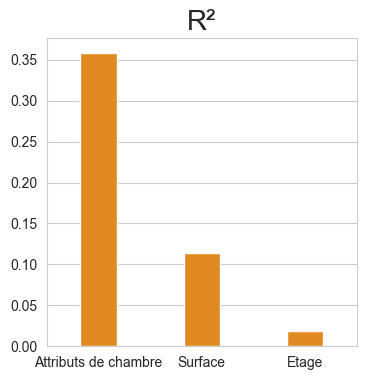

In [8]:
# R² values
r2_values = [r2_1, r2_2,r2_3]
sns.set_style("whitegrid")
plt.figure(figsize=(4,4))
sns.barplot(x=['Attributs de chambre', 'Surface','Etage'], y=r2_values, color='darkorange',width=0.35 )
plt.title('R²', fontsize=20)
# plt.xticks(rotation=45) 
plt.savefig("R².png")
plt.show()


#### Effects of different cities

In [9]:
villes = ["Ville_agadir"	,"Ville_bouskoura"	,"Ville_casablanca"	,"Ville_dar-bouazza"	,"Ville_kénitra", "Ville_marrakech","Ville_mohammedia"	,"Ville_rabat",	"Ville_salé"	,"Ville_tanger"]

In [10]:
dfs = {}
for ville in villes:
    dfs[ville] = df[df[ville] == 1]



In [11]:
r2_scores = []
mse_score=[]
rmse_score=[]
SE_score=[]
for ville in villes:
    df_ville = dfs[ville]
    X = df_ville.drop(columns=["Prix"]) 
    y = df_ville["Prix"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate R² score and othr metrics:
    r2_scores.append(r2_score(y_test, y_pred))
    mse_score.append(mean_squared_error(y_test, y_pred))
    rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    residuals1 = y_test - y_pred
    SE_score.append( np.sqrt(np.sum(residuals1**2) / (len(y_test) - 2)))



In [12]:
r2_scores_rounded = [round(score, 3) for score in r2_scores]
print(f'r2_score: {r2_scores_rounded}')
print()
mse_score_rounded = [round(score, 3) for score in mse_score]
print(f'mse_score: {mse_score_rounded}')
print()
rmse_score_rounded = [round(score, 3) for score in rmse_score]
print(f'rmse_score: {rmse_score_rounded}')
print()
SE_score_rounded = [round(score, 3) for score in SE_score]
print(f'SE_score: {SE_score_rounded}')


r2_score: [0.274, 0.427, 0.669, 0.631, 0.128, 0.409, 0.51, 0.659, 0.769, 0.635]

mse_score: [7457916.34, 9091556.377, 5237315.892, 4823645.375, 2713763.961, 8966645.277, 3849691.592, 7318166.627, 5572142.943, 8192625.949]

rmse_score: [2730.919, 3015.221, 2288.518, 2196.28, 1647.351, 2994.436, 1962.063, 2705.211, 2360.539, 2862.276]

SE_score: [2764.022, 3061.257, 2291.15, 2238.93, 1687.051, 3010.238, 1999.439, 2719.12, 2449.647, 2878.493]


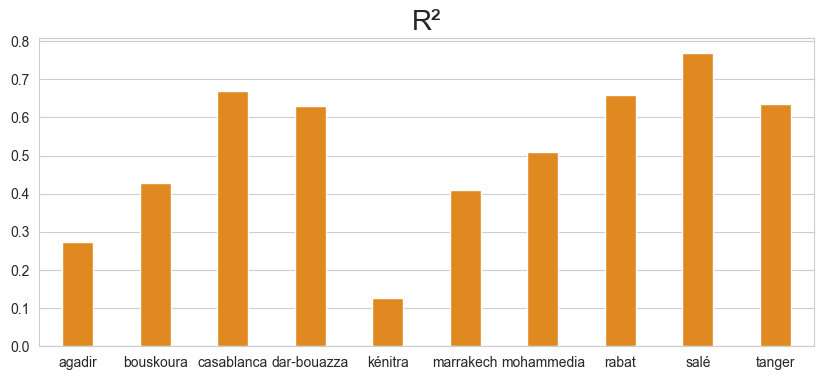

In [13]:
sns.set_style("whitegrid")
Villes = ["agadir","bouskoura","casablanca","dar-bouazza","kénitra", "marrakech","mohammedia","rabat","salé","tanger"]
plt.figure(figsize=(10,4))
sns.barplot(x=Villes, y=r2_scores, color='darkorange',width = 0.4)
plt.title('R²', fontsize=20)
# plt.xticks(rotation=45)

plt.savefig('R²2.png')
plt.show()


All results that we obtained in this general analysis of single factors will be discussed and interpreted in the project’s final report.

In [14]:
for ville in villes:
    print(df[ville].value_counts())

Ville_agadir
0    8384
1     417
Name: count, dtype: int64
Ville_bouskoura
0    8470
1     331
Name: count, dtype: int64
Ville_casablanca
0    4446
1    4355
Name: count, dtype: int64
Ville_dar-bouazza
0    8540
1     261
Name: count, dtype: int64
Ville_kénitra
0    8590
1     211
Name: count, dtype: int64
Ville_marrakech
0    7846
1     955
Name: count, dtype: int64
Ville_mohammedia
0    8531
1     270
Name: count, dtype: int64
Ville_rabat
0    7825
1     976
Name: count, dtype: int64
Ville_salé
0    8664
1     137
Name: count, dtype: int64
Ville_tanger
0    7913
1     888
Name: count, dtype: int64


In [15]:
df.to_csv("../CSV's/FinalDataSet.csv", index=False)